In [6]:
import os
import pyciemss
import torch
import pandas as pd
import numpy as np
from typing import Dict, List, Callable

import pyciemss.visuals.plots as plots
import pyciemss.visuals.vega as vega
import pyciemss.visuals.trajectories as trajectories

from pyciemss.integration_utils.intervention_builder import (
    param_value_objective,
    start_time_objective,
)

import json
from mira.metamodel import *
from mira.modeling.amr.petrinet import template_model_to_petrinet_json
from mira.sources.amr.petrinet import template_model_from_amr_json


smoke_test = ('CI' in os.environ)

In [2]:
model1 = "scenario2_q1_petrinet.json"
model2 = "scenario2_q2_petrinet.json"
model3 = "scenario2_q3_petrinet.json"
model4 = "scenario2_q4_petrinet.json"


In [3]:
end_time = torch.tensor(90.0)
logging_step_size = 1.0
num_samples = 1

## Question 2a

In [4]:
result_model1 = pyciemss.sample(model1, end_time, logging_step_size, num_samples)

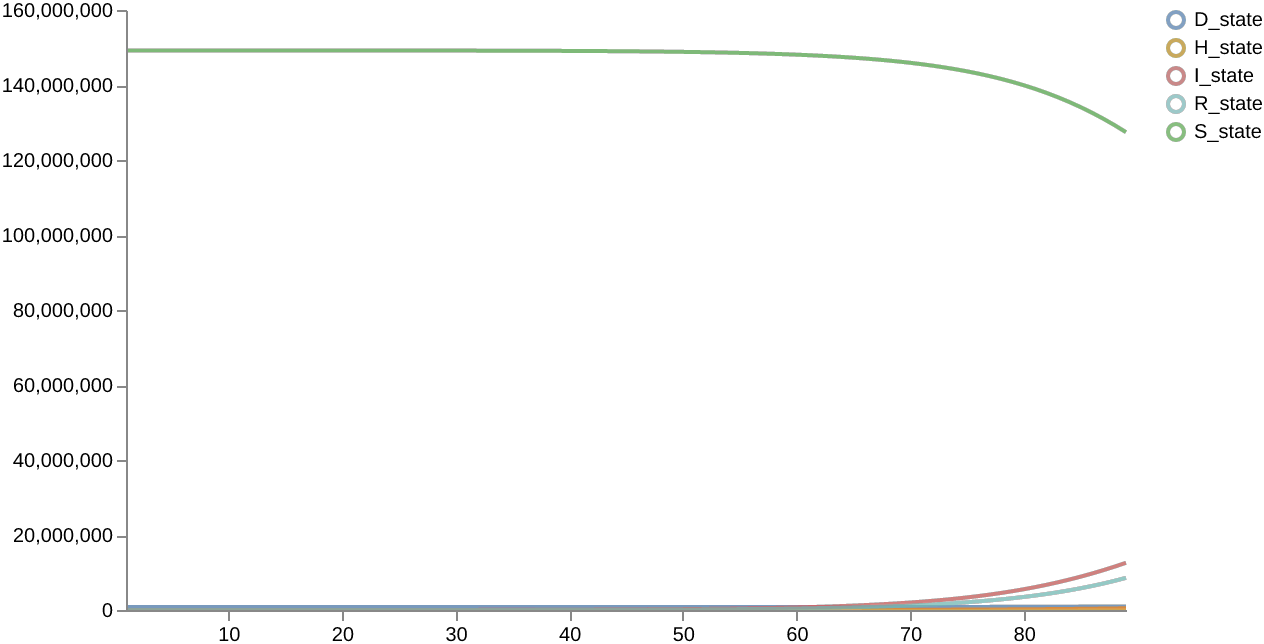

In [5]:
# Plot the original model

# we do not calibrate 
# we no dot plot agaist actual data
# and we use the original model with the default priors
# as the processed data were not made available to the evaluator
# see Scenario 3 for examples of pyciemss calibration

schema = plots.trajectories(result_model1["data"], keep=".*_state")
plots.save_schema(schema, "_schema.json")
plots.ipy_display(schema, dpi=150)

In [9]:

with open('scenario2_q1_petrinet.json', 'r') as fh:
    tm = template_model_from_amr_json(json.load(fh))

print(tm.parameters)

tm.parameters['beta'].value = .1

with open('scenario2_q1_petrinet_modified1.json', 'w') as fh:
    json.dump(template_model_to_petrinet_json(tm), fh, indent=1)


tm.parameters['beta'].value = .3

with open('scenario2_q1_petrinet_modified2.json', 'w') as fh:
    json.dump(template_model_to_petrinet_json(tm), fh, indent=1)
    

{'N': Parameter(name='N', display_name=None, description=None, identifiers={}, context={}, units=Unit(expression=person), value=150000000.0, distribution=None), 'beta': Parameter(name='beta', display_name=None, description=None, identifiers={}, context={}, units=Unit(expression=person/day), value=0.18, distribution=None), 'pir': Parameter(name='pir', display_name=None, description=None, identifiers={}, context={}, units=Unit(expression=1), value=0.9, distribution=None), 'rir': Parameter(name='rir', display_name=None, description=None, identifiers={}, context={}, units=Unit(expression=1/day), value=0.07, distribution=None), 'pih': Parameter(name='pih', display_name=None, description=None, identifiers={}, context={}, units=Unit(expression=1), value=0.1, distribution=None), 'rih': Parameter(name='rih', display_name=None, description=None, identifiers={}, context={}, units=Unit(expression=1/day), value=0.07, distribution=None), 'phd': Parameter(name='phd', display_name=None, description=No

In [11]:
model_paths = ["scenario2_q1_petrinet.json", "scenario2_q1_petrinet_modified1.json", 
               "scenario2_q1_petrinet_modified2.json"]

solution_mappings = [lambda x : x, lambda x : x, lambda x : x]

# even though models are deterministic
# we have uncertainty about their mixture weights

ensemble_result = pyciemss.ensemble_sample(model_paths, solution_mappings, end_time, logging_step_size,
                                            num_samples = 10, 
                                                    )

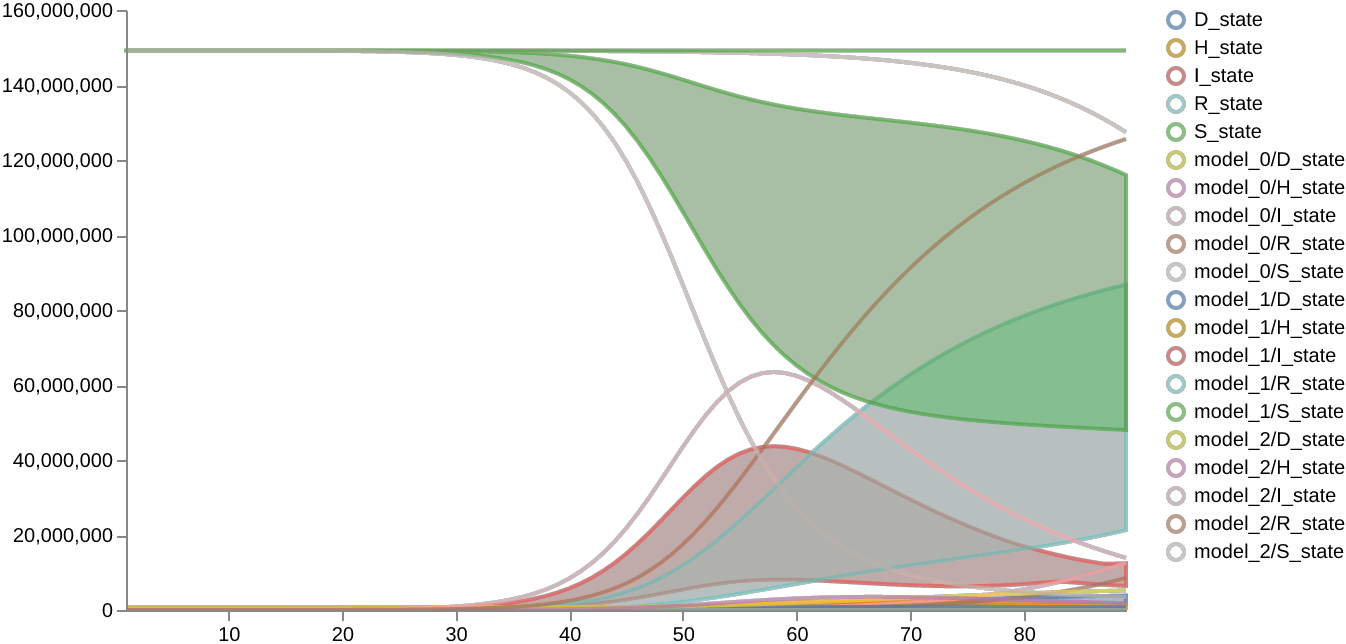

In [12]:

schema = plots.trajectories(ensemble_result["data"], keep=".*_state")
plots.save_schema(schema, "_schema.json")
plots.ipy_display(schema, dpi=150)

# there is much more uncertainty about the outcome, 
# an increase in infections is to be expected much sooner

## Question 7

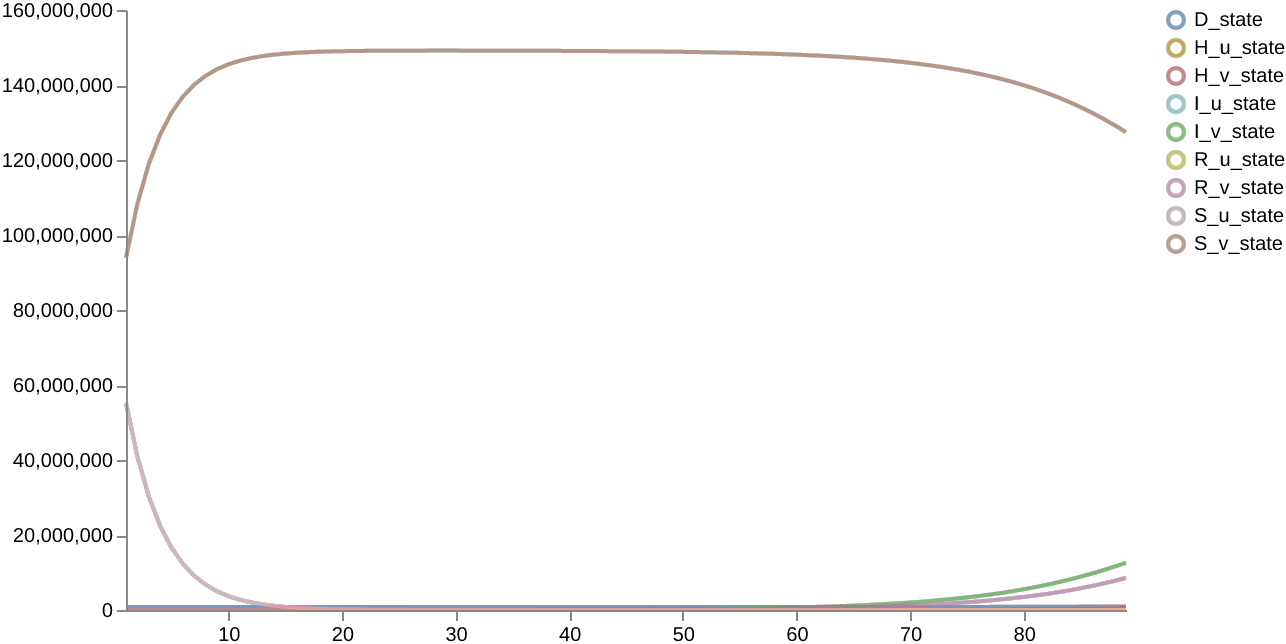

In [13]:
model_q4 = "scenario2_q4_petrinet.json"

result_model_q4 = pyciemss.sample(model_q4, end_time, logging_step_size, num_samples)

schema = plots.trajectories(result_model_q4["data"], keep=".*_state")
plots.save_schema(schema, "_schema.json")
plots.ipy_display(schema, dpi=150)


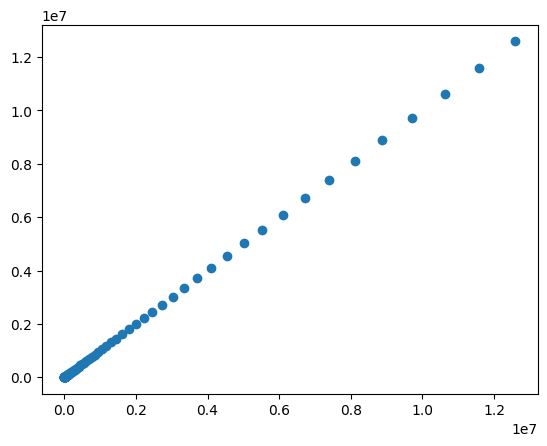

In [17]:
# this comparison to be more fair
# would require diving into the vaccination rate
# which can be gotten from the states, 
# but requires mundane data analysis that is not the focus of this exercise

# so just to give a flavor 
infected_original = result_model1["data"]["I_state"]
infected_vaccinated = result_model_q4["data"]["I_v_state"]

import matplotlib.pyplot as plt

plt.scatter(infected_original, infected_vaccinated)
plt.show()

# another reason why this doesn't show much
# is that we are using uncalibrated models
# due to the lack of data

## Questions 8/9

In [18]:
model_q8 = "scenario2_q8_petrinet.json"
model_q9 = "scenario2_q9_petrinet.json"

result_model_q8 = pyciemss.sample(model_q8, end_time, logging_step_size, num_samples)
result_model_q9 = pyciemss.sample(model_q9, end_time, logging_step_size, num_samples)


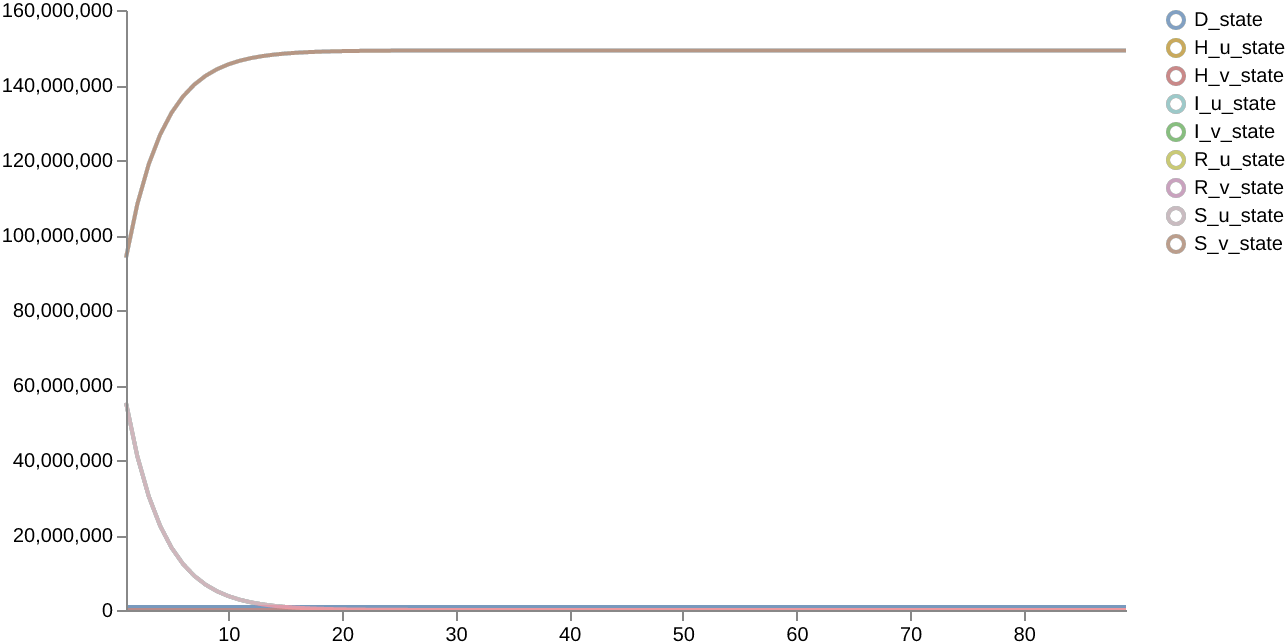

In [19]:

schema = plots.trajectories(result_model_q8["data"], keep=".*_state")
plots.save_schema(schema, "_schema.json")
plots.ipy_display(schema, dpi=150)

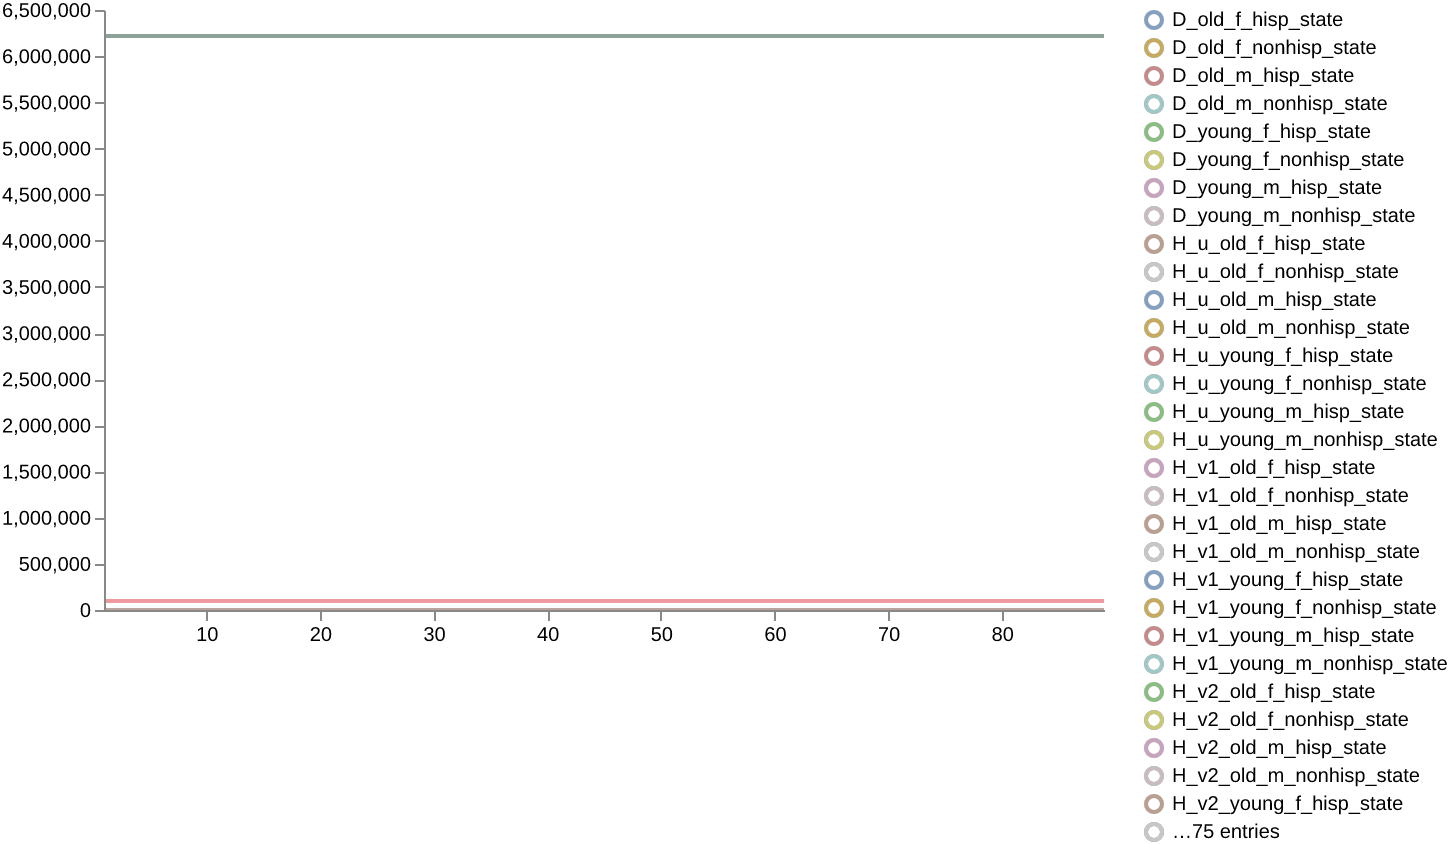

In [20]:
schema = plots.trajectories(result_model_q9["data"], keep=".*_state")
plots.save_schema(schema, "_schema.json")
plots.ipy_display(schema, dpi=150)

## Question 12

We don't have the data, so we're just going to pretend one of the compartments is in our focus.

In [32]:

with open('scenario2_q9_petrinet.json', 'r') as fh:
    tm = template_model_from_amr_json(json.load(fh))

print(tm.parameters)

# It's difficult to map stratified parameters to semantically meaningful concepts
# to illustrate interventions, we'll just deploy an intervention for the q8 model


{'N': Parameter(name='N', display_name=None, description=None, identifiers={}, context={}, units=Unit(expression=person), value=150000000.0, distribution=None), 'beta_0_0_0_0': Parameter(name='beta_0_0_0_0', display_name=None, description=None, identifiers={}, context={}, units=Unit(expression=person/day), value=0.18, distribution=None), 'p_dec_transm_max_0_0_0': Parameter(name='p_dec_transm_max_0_0_0', display_name=None, description=None, identifiers={}, context={}, units=None, value=0.5, distribution=None), 'p_dec_transm_min_0_0_0': Parameter(name='p_dec_transm_min_0_0_0', display_name=None, description=None, identifiers={}, context={}, units=None, value=0.25, distribution=None), 'p_test_acc_0_0_0': Parameter(name='p_test_acc_0_0_0', display_name=None, description=None, identifiers={}, context={}, units=None, value=0.75, distribution=None), 'beta_0_0_0_1': Parameter(name='beta_0_0_0_1', display_name=None, description=None, identifiers={}, context={}, units=Unit(expression=person/day)

In [41]:

with open('scenario2_q8_petrinet.json', 'r') as fh:
    tm = template_model_from_amr_json(json.load(fh))


tm.parameters['p_test_acc'].distribution = Distribution(type='StandardUniform1',
                                                 parameters={'minimum': 0.7, 'maximum': 0.8})

tm.parameters['p_dec_transm_min'].distribution = Distribution(type='StandardUniform1',
                                                 parameters={'minimum': 0.2, 'maximum': 0.3})


with open('scenario2_q8_petrinet_modified_distro.json', 'w') as fh:
    json.dump(template_model_to_petrinet_json(tm), fh, indent=1)


print(tm.parameters.keys())

# we'll intervene on 'p_test_acc'

dict_keys(['N', 'beta_0', 'p_dec_transm_max', 'p_dec_transm_min', 'p_test_acc', 'beta_1', 'beta_2', 'beta_3', 'pir_0', 'rir_0', 'pir_1', 'rir_1', 'pih_0', 'rih_0', 'pih_1', 'rih_1', 'phd_0', 'rhd_0', 'phd_1', 'rhd_1', 'phr_0', 'rhr_0', 'phr_1', 'rhr_1', 'v_a', 'v_b', 'I0', 'R0', 'H0', 'D0'])


In [42]:


static_param_interventions = {torch.tensor(10.0):
                              {'p_test_acc': torch.tensor(0.9)}
}

intervened_result_model_q8 = pyciemss.sample('scenario2_q8_petrinet_modified_distro.json', end_time, logging_step_size, num_samples, 
                                             static_parameter_interventions = static_param_interventions)

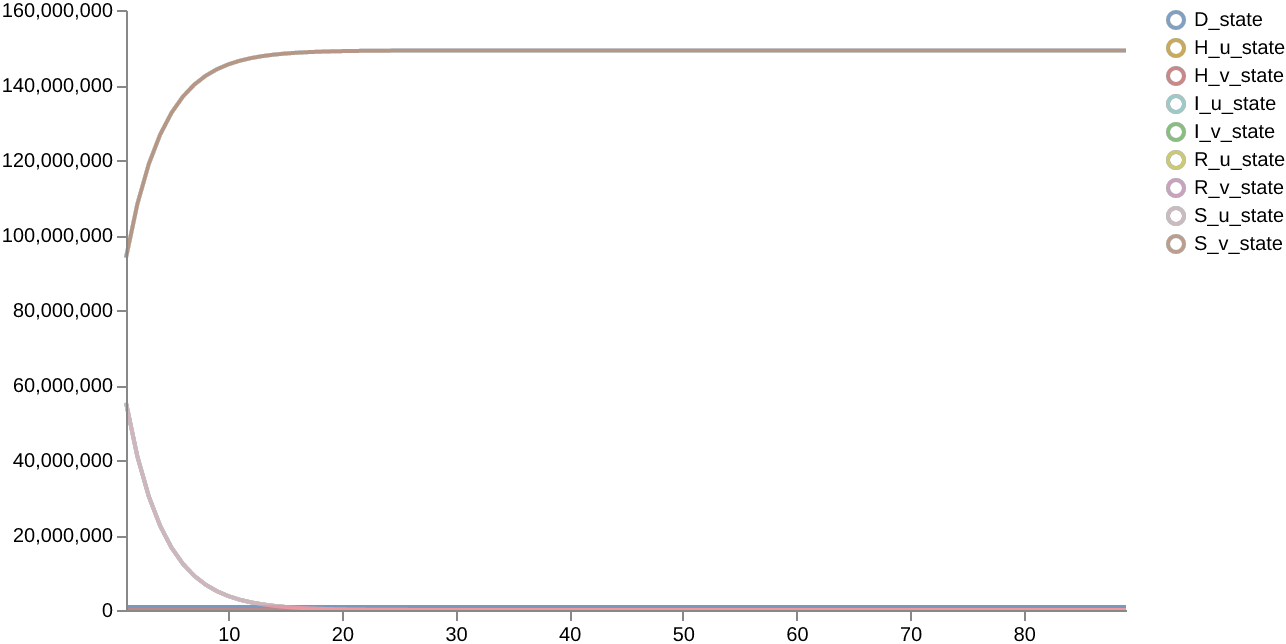

In [43]:
schema = plots.trajectories(intervened_result_model_q8["data"], keep=".*_state")
plots.save_schema(schema, "_schema.json")
plots.ipy_display(schema, dpi=150)

# with the other parameters we're given
# this intervention appears to have no effect

In [44]:

static_param_interventions2 = {torch.tensor(10.0):
                              {'p_dec_transm_min': torch.tensor(0.4)}
}

intervened_result_model_q8_transm = pyciemss.sample('scenario2_q8_petrinet_modified_distro.json', end_time, logging_step_size, num_samples, 
                                             static_parameter_interventions = static_param_interventions2)

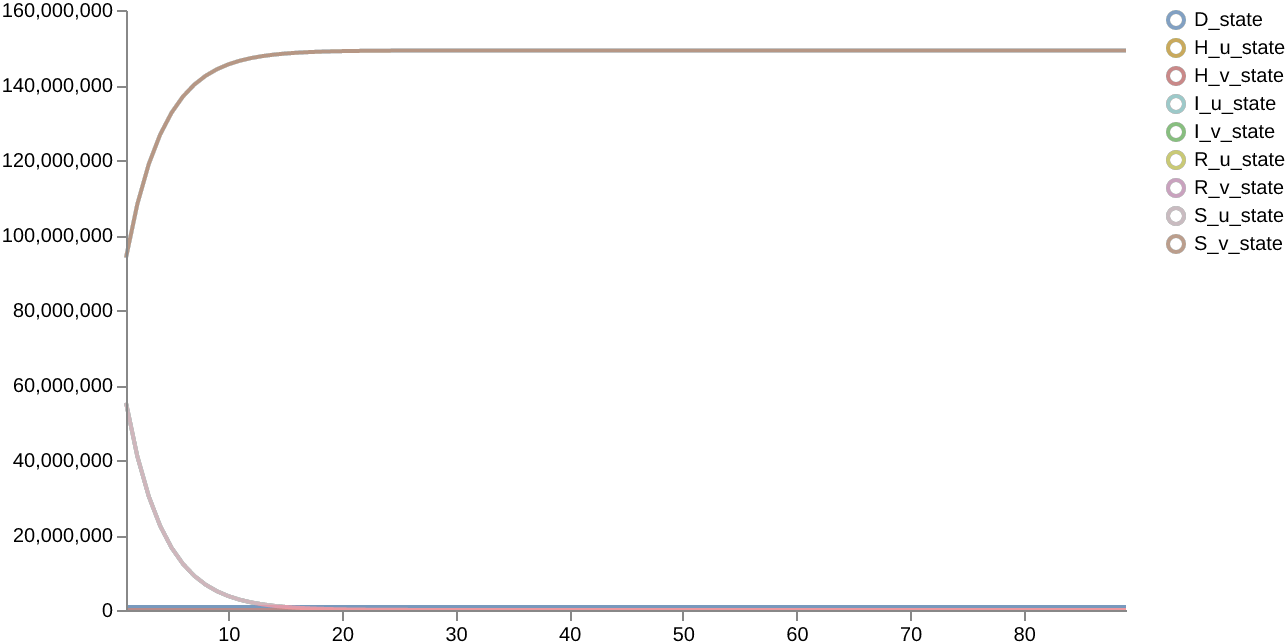

In [45]:
schema = plots.trajectories(intervened_result_model_q8_transm["data"], keep=".*_state")
plots.save_schema(schema, "_schema.json")
plots.ipy_display(schema, dpi=150)

# with the other parameters we're given
# this intervention appears to have no effect